In [138]:
import pandas as pd
from matplotlib import pyplot as plt
import imageio

#### Step 2

In [64]:
life_exp = pd.read_csv('./data/life_expectancy.csv', index_col='country')
life_exp.shape

(212, 63)

In [66]:
life_exp.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [68]:
population = pd.read_csv('./data/population.csv', index_col='country')
population.shape

(197, 301)

In [70]:
population.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=301)

In [73]:
fertility = pd.read_csv('./data/fertility_rate_total.csv', index_col='country')
fertility.shape

(213, 63)

In [75]:
fertility.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

#### Step 3

In [104]:
year_2015 = pd.DataFrame({
    'life_expectancy' : life_exp['2015'],
    'fertility' : fertility['2015']
})
year_2015

,life_expectancy,fertility
country,,
Afghanistan,62.7,5.41
Albania,78.6,1.61
Algeria,75.6,3.04
Andorra,NaN,NaN
Angola,60.7,5.77
...,...,...
Vietnam,73.9,1.95
Virgin Islands (U.S.),79.0,2.11
Yemen,65.9,4.32


#### Step 4

In [286]:
year_2015.isna().sum()

life_expectancy    4
fertility          3
dtype: int64

In [293]:
clean_year_2015 = year_2015.dropna()
clean_year_2015.isna().sum()

life_expectancy    0
fertility          0
dtype: int64

#### Step 5

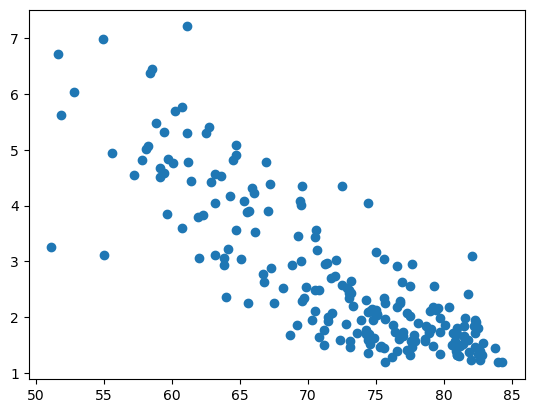

In [114]:
plt.scatter(clean_year_2015['life_expectancy'], clean_year_2015['fertility'])

#### Step 6

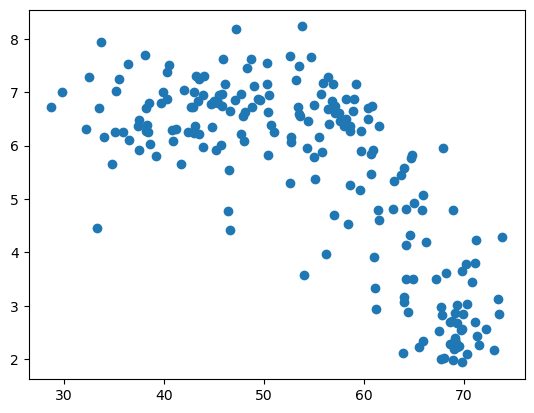

In [122]:
year_1960 = pd.DataFrame({
    'life_expectancy' : life_exp['1960'],
    'fertility' : fertility['1960']
})

clean_year_1960 = year_1960.dropna()
plt.scatter(clean_year_1960['life_expectancy'], clean_year_1960['fertility'])

#### Step 7

In [295]:
def create_clean_DF(year):
    df = pd.DataFrame({
        'life_expectancy' : life_exp[f'{year}'],
        'fertility' : fertility[f'{year}']
        })
    df = df.dropna()
    return df

In [297]:
def create_scatterplot(year):
    df = create_clean_DF(year)
    plot = plt.scatter(df['life_expectancy'], df['fertility'])
    return plot

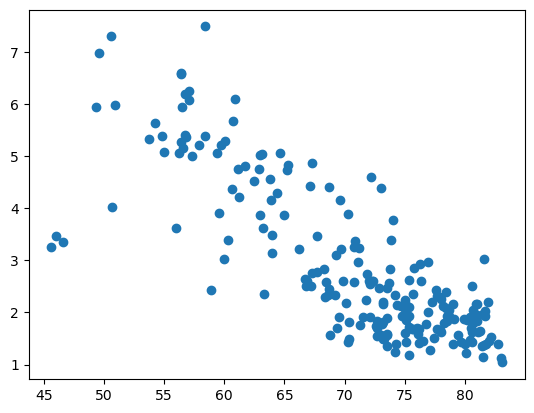

In [299]:
create_scatterplot(2010)

#### Step 8

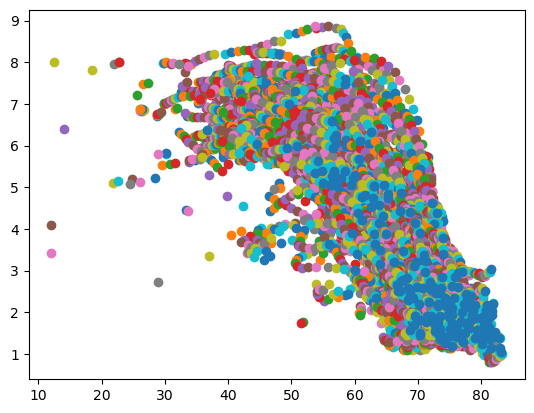

In [185]:
for year in range(1960, 2011):
    create_scatterplot(year)
    plt.savefig(f'{year}')

#### Step 9

In [196]:
plots = [
    
    imageio.imread(f'./plots/{year}.png')
    for year in range(1960, 2011)
    
]

imageio.mimsave('animation.gif', plots, fps=20)

/var/folders/fl/ds1jtfms3b5gj9576jhd3lc80000gn/T/ipykernel_7695/1230804676.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.imread(f'./plots/{year}.png')


#### Step 10

In [246]:
def pop_convert(pop):
    if isinstance(pop, str):  
        if pop.endswith('k'):
            return int(float(pop[:-1]) * 1_000)  
        elif pop.endswith('M'):
            return int(float(pop[:-1]) * 1_000_000)  
        elif pop.endswith('B'):
            return int(float(pop[:-1]) * 1_000_000_000) 
        else:
            return int(float(pop))
    else:
        return pop

population_convert = population.map(pop_convert)
population_convert

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,124000000.0,125000000.0,126000000.0,126000000.0,127000000.0,128000000.0,128000000.0,129000000.0,130000000.0,130000000.0
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,139000000.0,140000000.0,142000000.0,143000000.0,144000000.0,145000000.0,147000000.0,148000000.0,149000000.0,150000000.0
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1340000.0,1320000.0,1300000.0,1290000.0,1270000.0,1250000.0,1230000.0,1220000.0,1200000.0,1180000.0
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,52800.0,52100.0,51500.0,50800.0,50200.0,49600.0,49000.0,48400.0,47800.0,47200.0
UAE,40200,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,24100000.0,24300000.0,24500000.0,24700000.0,25000000.0,25200000.0,25400000.0,25700000.0,25900000.0,26100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,47300,47300,47300,47300,47300,47300,47300,47200,47200,47200,...,370000.0,372000.0,374000.0,375000.0,377000.0,378000.0,380000.0,381000.0,382000.0,384000.0
Yemen,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,...,107000000.0,107000000.0,107000000.0,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0
South Africa,1450000,1450000,1460000,1460000,1470000,1470000,1480000,1490000,1490000,1500000,...,92400000.0,92600000.0,92900000.0,93100000.0,93300000.0,93500000.0,93700000.0,93900000.0,94100000.0,94300000.0


#### Step 11

In [307]:
population_convert = population_convert.map(lambda pop : pop / 100_000)